In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.file_locations import data_files_location


In [14]:
print(uproot.open(f"{data_files_location}/MCC9.10_Run4b_v10_04_07_09_BNB_nue_overlay_surprise_reco2_hist.root")["wcpselection"]["T_PFeval"].arrays("evtTimeNS_cor", library="np", entry_stop=10)["evtTimeNS_cor"])


[  8543.989  -99999.       7296.3994   7413.3315   8070.3525   7466.5693
   8166.765    7446.8535   8503.157    7355.3003]


In [15]:
print(uproot.open(f"{data_files_location}/isotropic_one_gamma_run45_1k.root")["wcpselection"]["T_PFeval"].arrays("evtTimeNS_cor", library="np", entry_stop=10)["evtTimeNS_cor"])


KeyInFileError: not found: 'evtTimeNS_cor'
in file /nevis/riverside/data/lhagaman/ngem/data_files/isotropic_one_gamma_run45_1k.root
in object /wcpselection/T_PFeval;1

In [16]:
print(uproot.open(f"{data_files_location}/delete_one_gamma_run45_1k.root")["wcpselection"]["T_PFeval"].arrays("evtTimeNS_cor", library="np", entry_stop=10)["evtTimeNS_cor"])


KeyInFileError: not found: 'evtTimeNS_cor'
in file /nevis/riverside/data/lhagaman/ngem/data_files/delete_one_gamma_run45_1k.root
in object /wcpselection/T_PFeval;1

In [9]:
print(uproot.open(f"{data_files_location}/MCC9.10_Run4b_v10_04_07_09_BNB_nue_overlay_surprise_reco2_hist.root")["wcpselection"]["T_BDTvars"].arrays("match_isFC", library="np")["match_isFC"])
print(uproot.open(f"{data_files_location}/delete_one_gamma_run45_1k.root")["wcpselection"]["T_BDTvars"].arrays("match_isFC", library="np")["match_isFC"])
print(uproot.open(f"{data_files_location}/isotropic_one_gamma_run45_1k.root")["wcpselection"]["T_BDTvars"].arrays("match_isFV", match_isFC="np")["match_isFC"])


[0. 0. 0. ... 0. 0. 0.]


KeyInFileError: not found: 'match_isFC'
in file /nevis/riverside/data/lhagaman/ngem/data_files/delete_one_gamma_run45_1k.root
in object /wcpselection/T_BDTvars;1

# File Loading

In [4]:
#del1g_f = uproot.open(f"{data_files_location}/partial_100_file_del1g_test.root")
del1g_f = uproot.open(f"{data_files_location}/delete_one_gamma_run45_1k.root")
del1g_f.items()

iso1g_f = uproot.open(f"{data_files_location}/isotropic_one_gamma_run45_1k.root")
iso1g_f.items()


[('nuselection;1', <ReadOnlyDirectory '/nuselection' at 0x7ff2eece5820>),
 ('nuselection/NeutrinoSelectionFilter;1',
  <TTree 'NeutrinoSelectionFilter' (923 branches) at 0x7ff2eeceb5e0>),
 ('nuselection/SubRun;1', <TTree 'SubRun' (3 branches) at 0x7ff2eece58b0>),
 ('nuselection/H_time;1', <TH1F (version 3) at 0x7ff2ed087430>),
 ('nuselection/H_maxH;1', <TH1F (version 3) at 0x7ff2ed087550>),
 ('nuselection/H_t0_Beam;1', <TH1F (version 3) at 0x7ff2ed08c6a0>),
 ('nuselection/H_TimeVsPh;1', <TH2F (version 4) at 0x7ff2ed0927f0>),
 ('nuselection/H_Truthtime;1', <TH1F (version 3) at 0x7ff2ed018940>),
 ('nuselection/H_SimTime;1', <TH1F (version 3) at 0x7ff2ed01eb20>),
 ('nuselection/H_ns_time;1', <TH1F (version 3) at 0x7ff2ed023c70>),
 ('shrreco3d;1', <ReadOnlyDirectory '/shrreco3d' at 0x7ff2eece56d0>),
 ('shrreco3d/_energy_tree;1',
  <TTree '_energy_tree' (6 branches) at 0x7ff2ed02de50>),
 ('shrreco3d/_dedx_tree;1',
  <TTree '_dedx_tree' (24 branches) at 0x7ff2eece5910>),
 ('shrreco3d/_rcshr_

KeyInFileError: not found: 'match_isFV'
in file /nevis/riverside/data/lhagaman/ngem/data_files/delete_one_gamma_run45_1k.root
in object /wcpselection/T_BDTvars;1

# Reco Neutrino Energy Comparisons

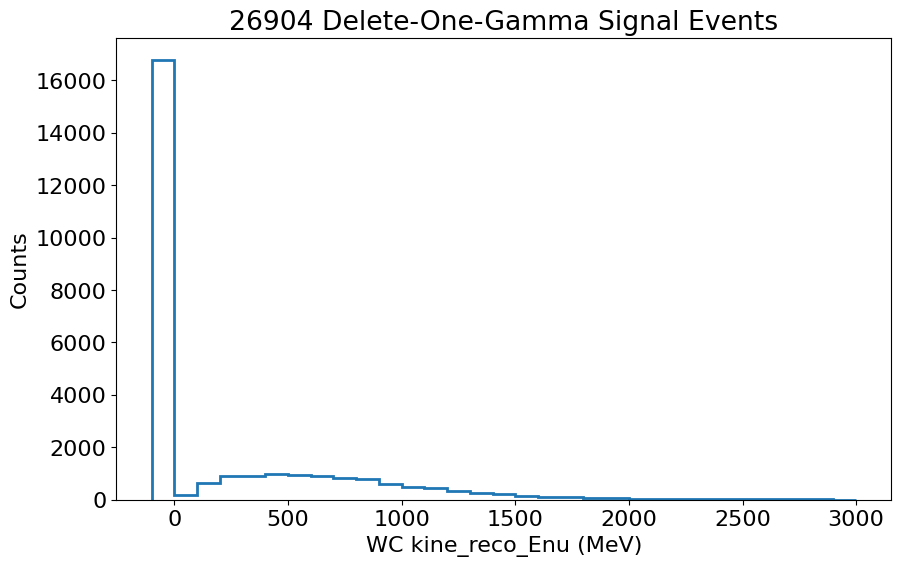

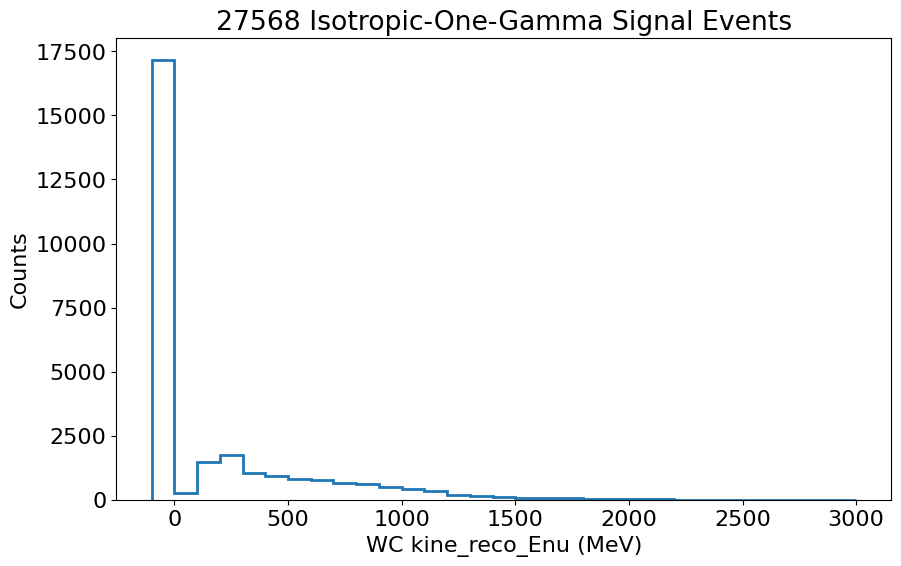

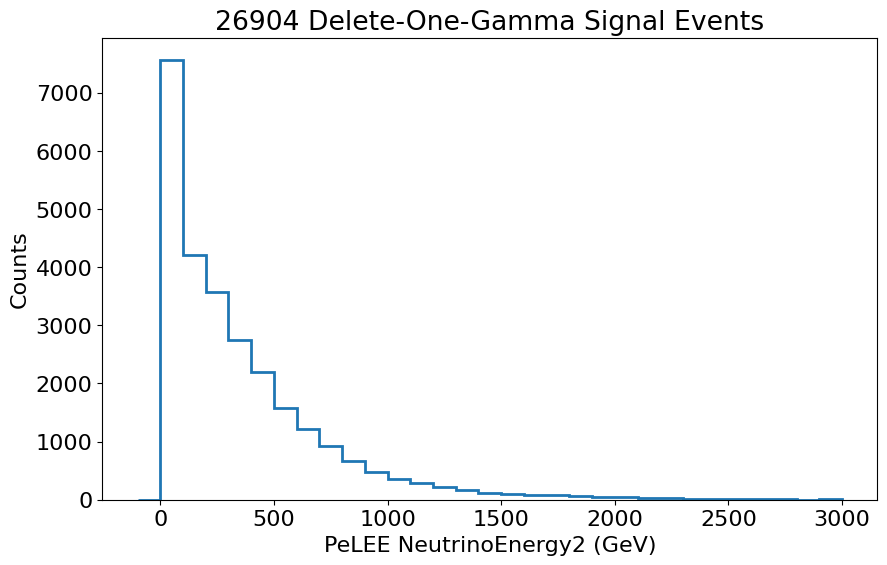

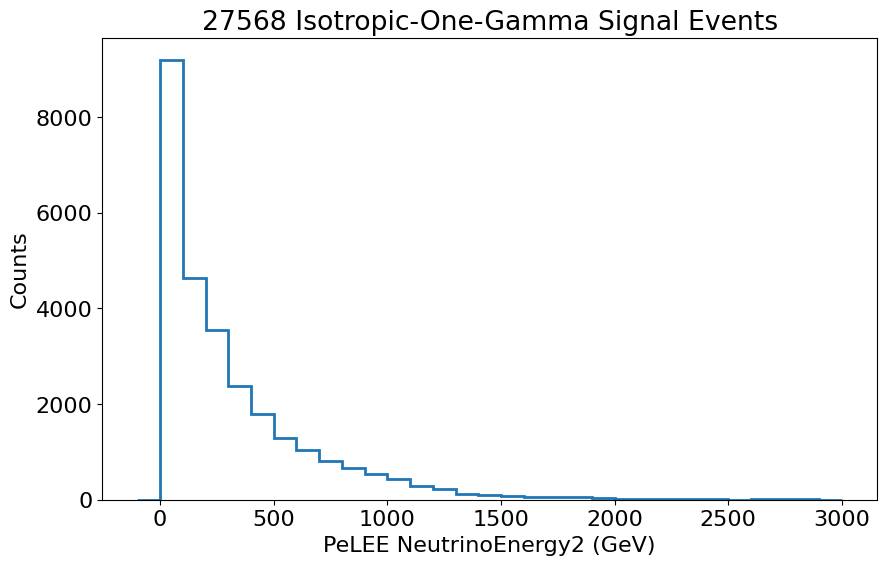

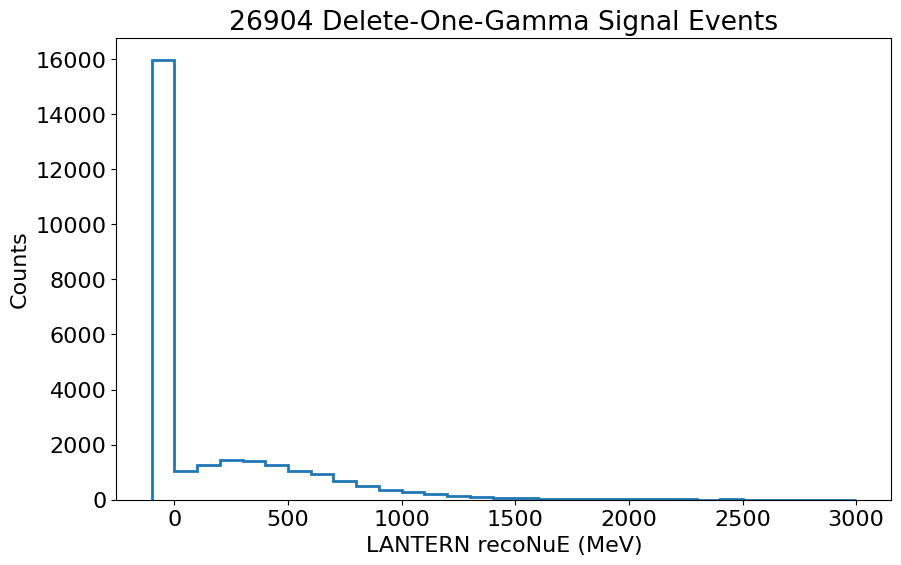

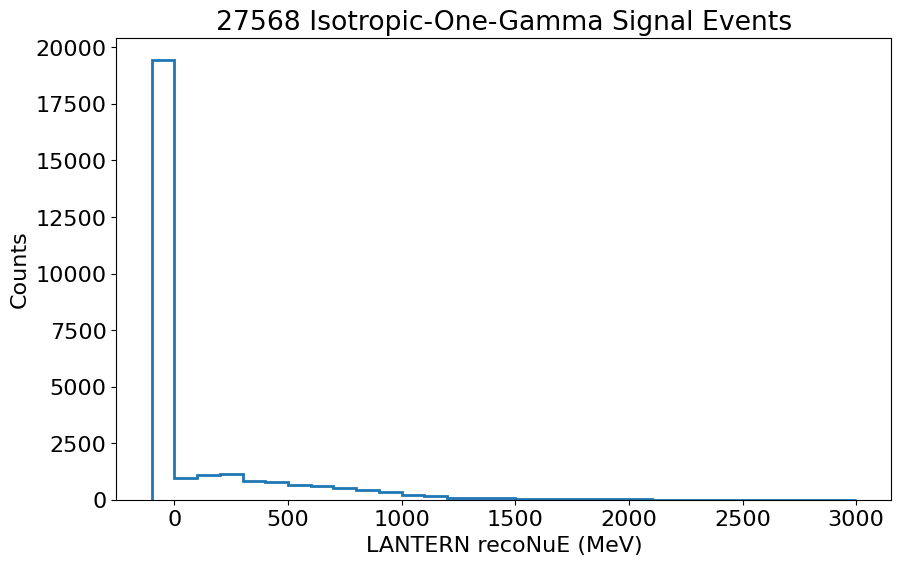

In [3]:
plt.rcParams.update({'font.size': 16})

bins = np.linspace(-100, 3000, 32)
del1g_wc_kine_reco_Enu = del1g_f["wcpselection"]["T_KINEvars"].arrays("kine_reco_Enu", library="np")["kine_reco_Enu"]
iso1g_wc_kine_reco_Enu = iso1g_f["wcpselection"]["T_KINEvars"].arrays("kine_reco_Enu", library="np")["kine_reco_Enu"]
del1g_num_events = len(del1g_wc_kine_reco_Enu)
iso1g_num_events = len(iso1g_wc_kine_reco_Enu)

plt.figure(figsize=(10, 6))
plt.hist(del1g_wc_kine_reco_Enu, bins=bins, histtype="step", lw=2)
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("Counts")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(iso1g_wc_kine_reco_Enu, bins=bins, histtype="step", lw=2)
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("Counts")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()

bins = np.linspace(-100, 3000, 32)
del1g_pelee_NeutrinoEnergy2 = del1g_f["nuselection"]["NeutrinoSelectionFilter"].arrays("NeutrinoEnergy2", library="np")["NeutrinoEnergy2"]
iso1g_pelee_NeutrinoEnergy2 = iso1g_f["nuselection"]["NeutrinoSelectionFilter"].arrays("NeutrinoEnergy2", library="np")["NeutrinoEnergy2"]
plt.figure(figsize=(10, 6))
plt.hist(del1g_pelee_NeutrinoEnergy2, bins=bins, histtype="step", lw=2)
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("Counts")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(iso1g_pelee_NeutrinoEnergy2, bins=bins, histtype="step", lw=2)
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("Counts")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()


del1g_lantern_recoNuE = del1g_f["lantern"]["EventTree"].arrays("recoNuE", library="np")["recoNuE"]
iso1g_lantern_recoNuE = iso1g_f["lantern"]["EventTree"].arrays("recoNuE", library="np")["recoNuE"]
bins = np.linspace(-100, 3000, 32)
plt.figure(figsize=(10, 6))
plt.hist(del1g_lantern_recoNuE, bins=bins, histtype="step", lw=2)
plt.xlabel("LANTERN recoNuE (MeV)")
plt.ylabel("Counts")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(iso1g_lantern_recoNuE, bins=bins, histtype="step", lw=2)
plt.xlabel("LANTERN recoNuE (MeV)")
plt.ylabel("Counts")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()




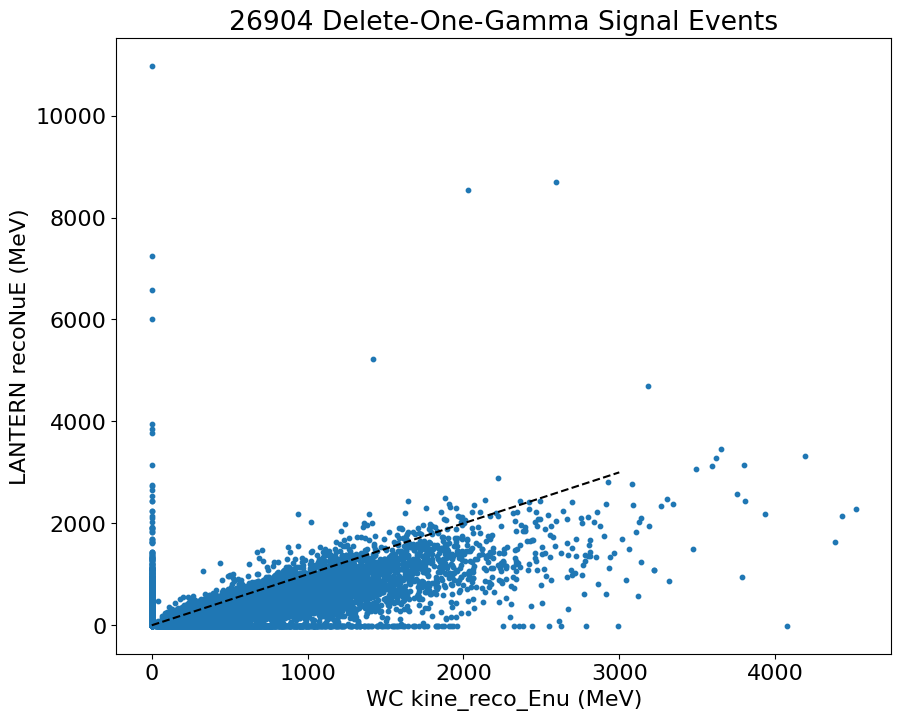

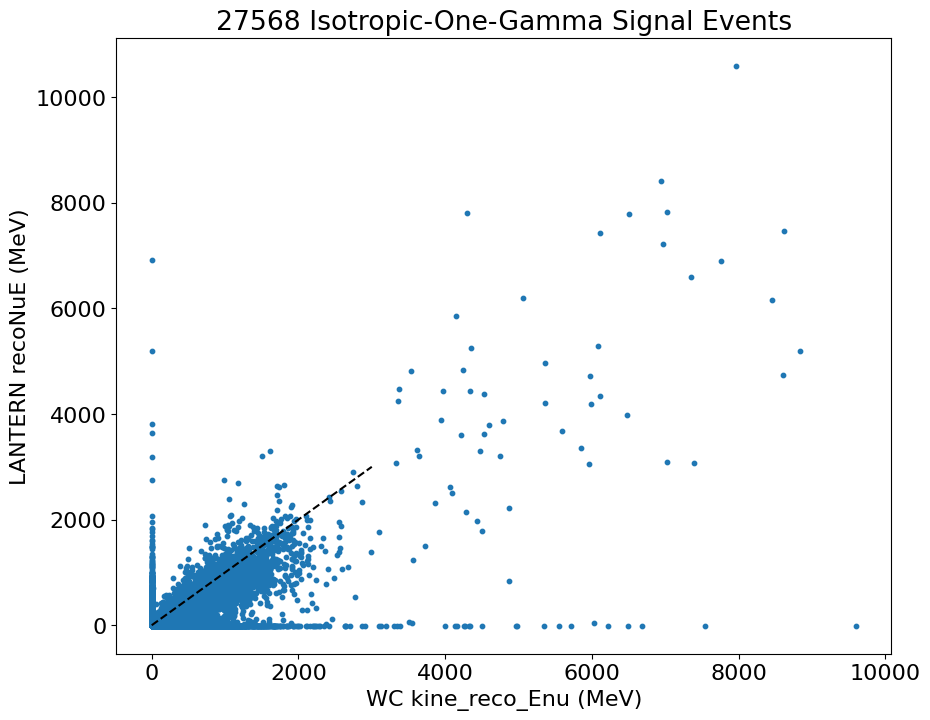

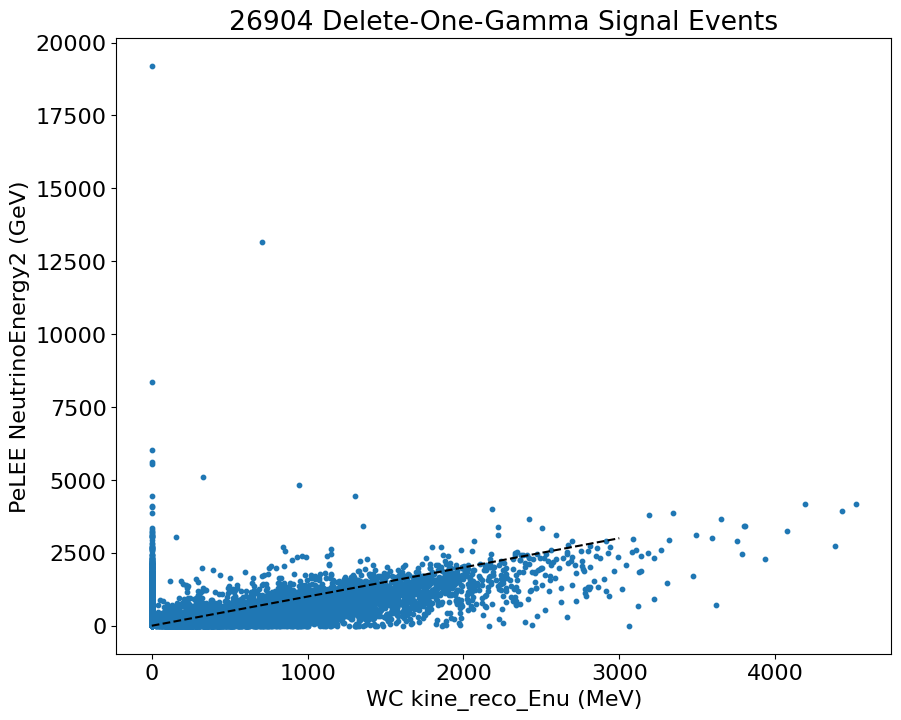

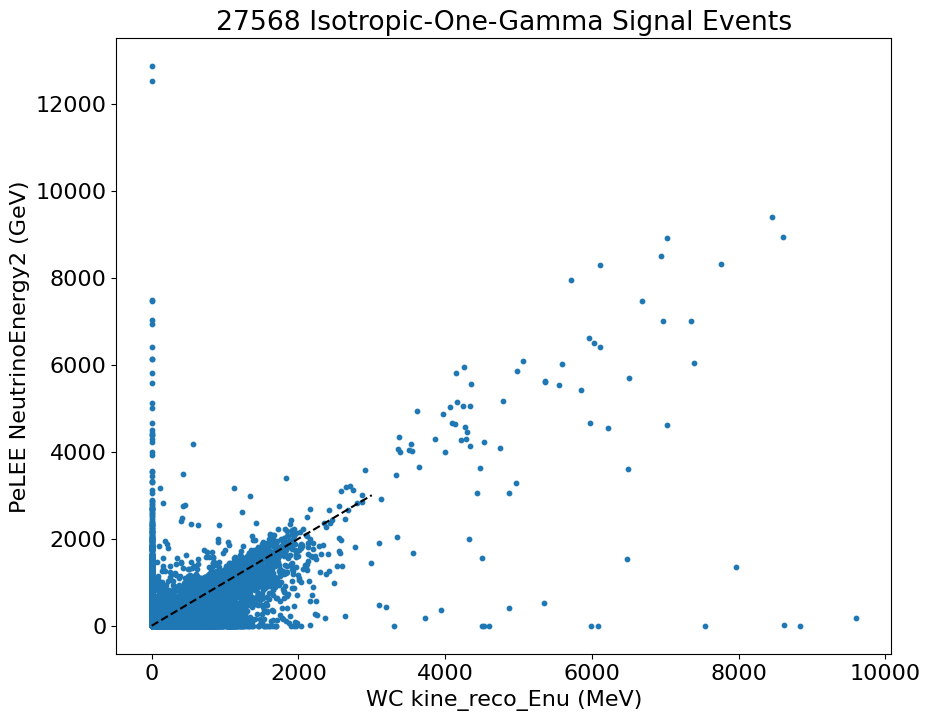

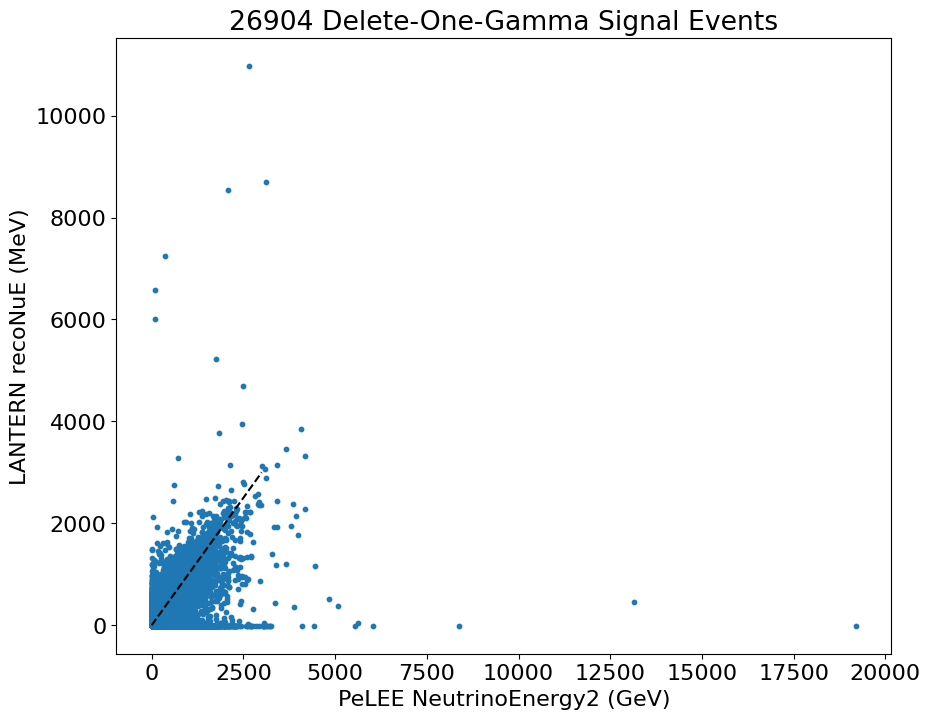

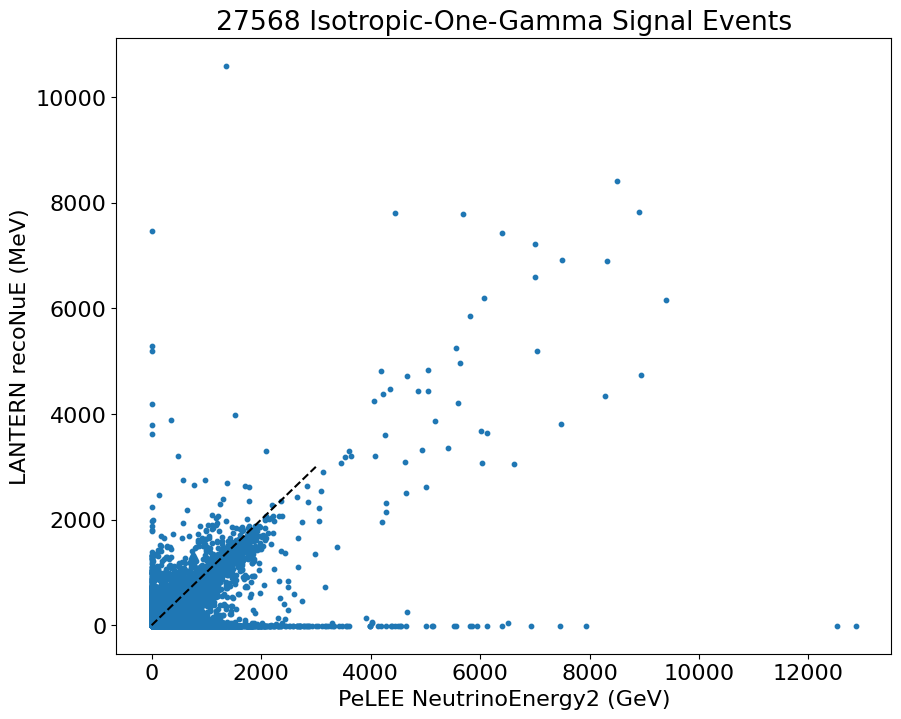

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(del1g_wc_kine_reco_Enu, del1g_lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 8))
plt.scatter(iso1g_wc_kine_reco_Enu, iso1g_lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(del1g_wc_kine_reco_Enu, del1g_pelee_NeutrinoEnergy2, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 8))
plt.scatter(iso1g_wc_kine_reco_Enu, iso1g_pelee_NeutrinoEnergy2, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("WC kine_reco_Enu (MeV)")
plt.ylabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(del1g_pelee_NeutrinoEnergy2, del1g_lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.show()
plt.figure(figsize=(10, 8))
plt.scatter(iso1g_pelee_NeutrinoEnergy2, iso1g_lantern_recoNuE, s=10)
plt.plot([0, 3000], [0, 3000], "k--")
plt.xlabel("PeLEE NeutrinoEnergy2 (GeV)")
plt.ylabel("LANTERN recoNuE (MeV)")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.show()

# Spacepoint Event Displays

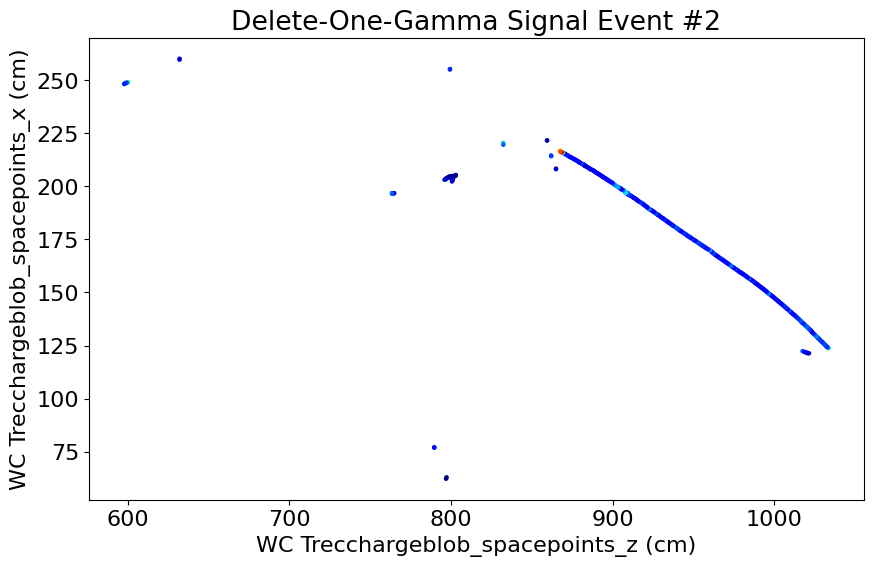

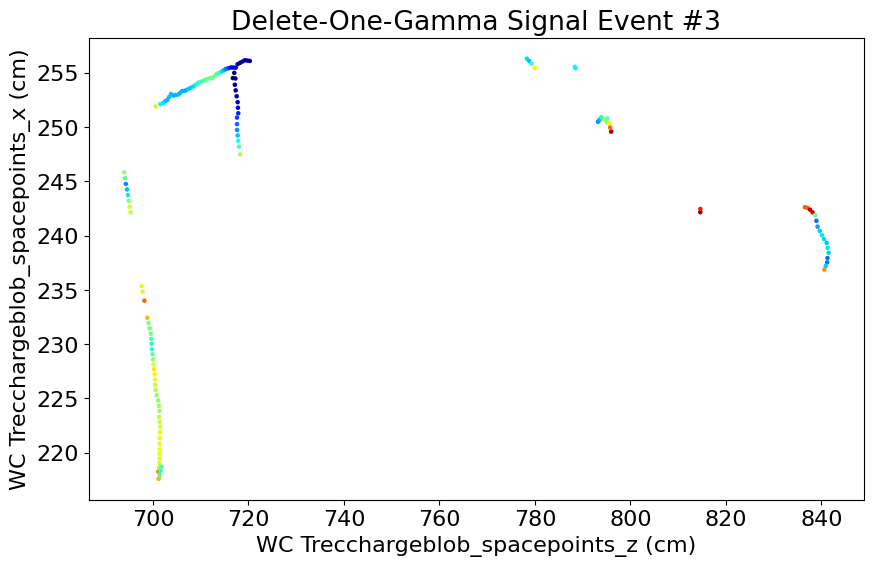

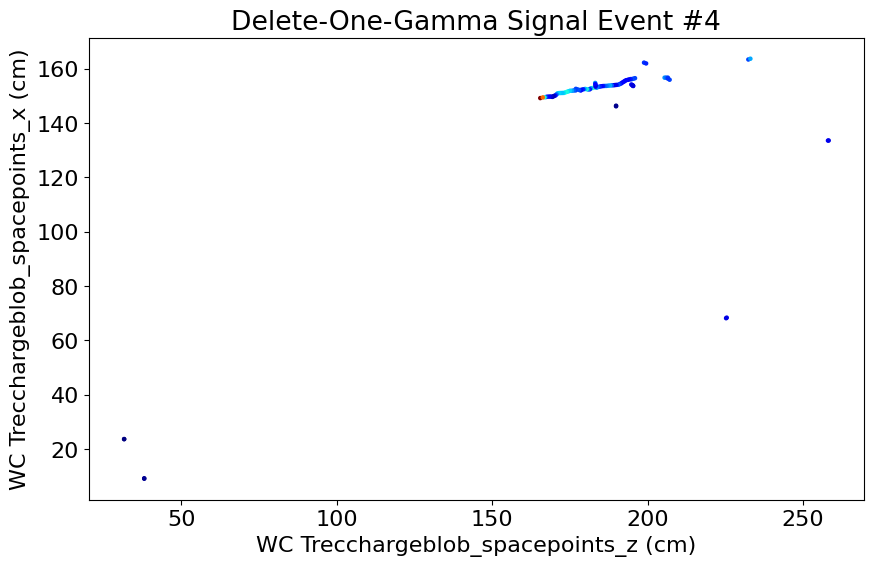

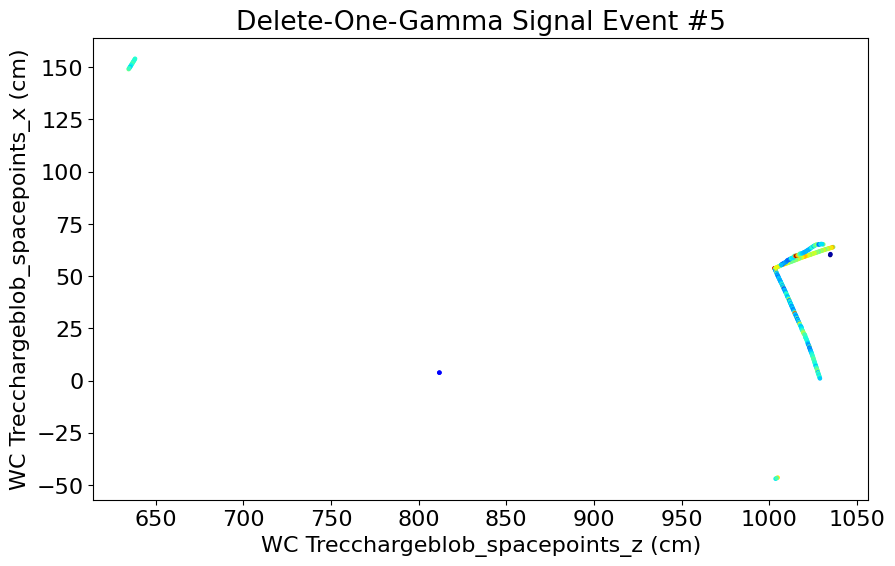

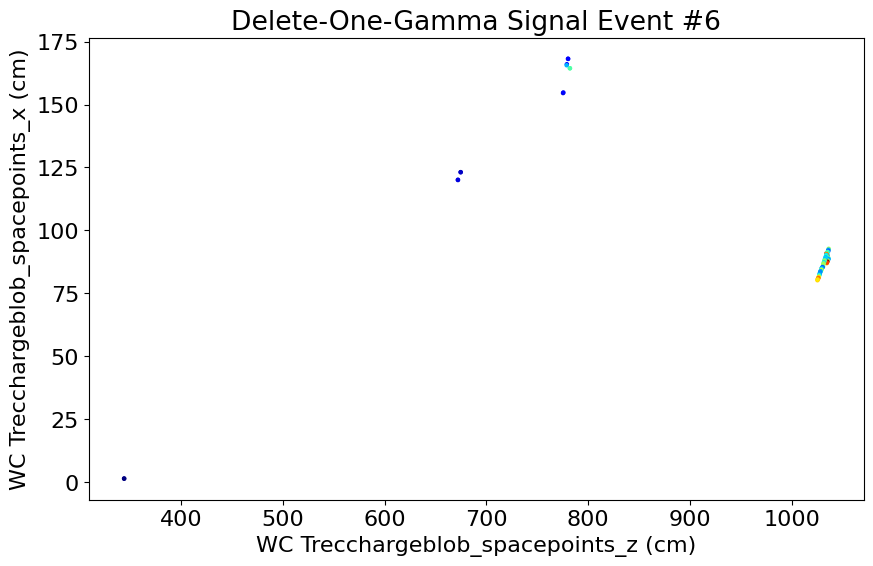

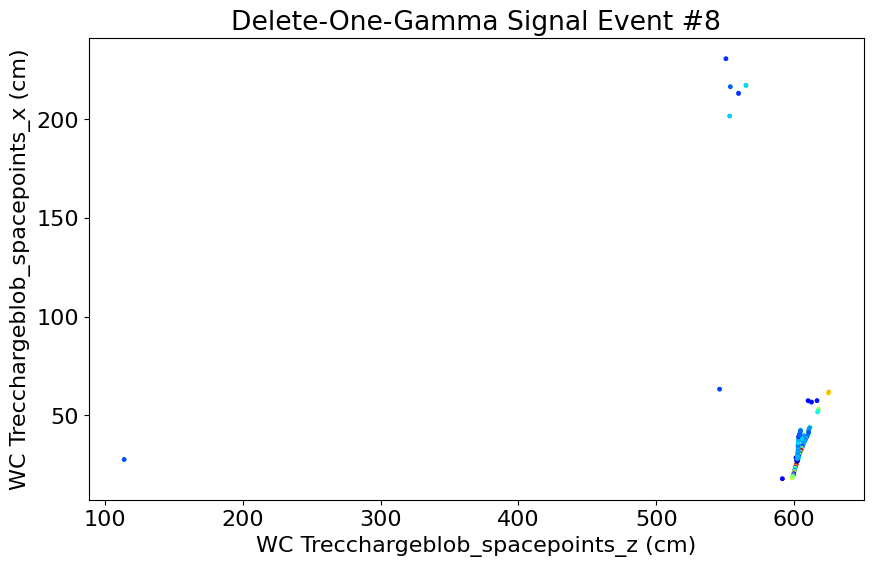

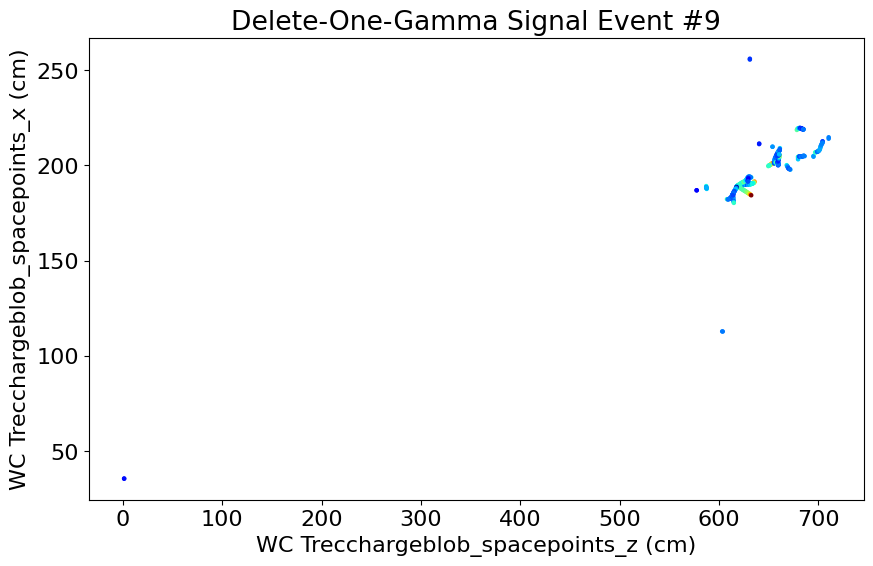

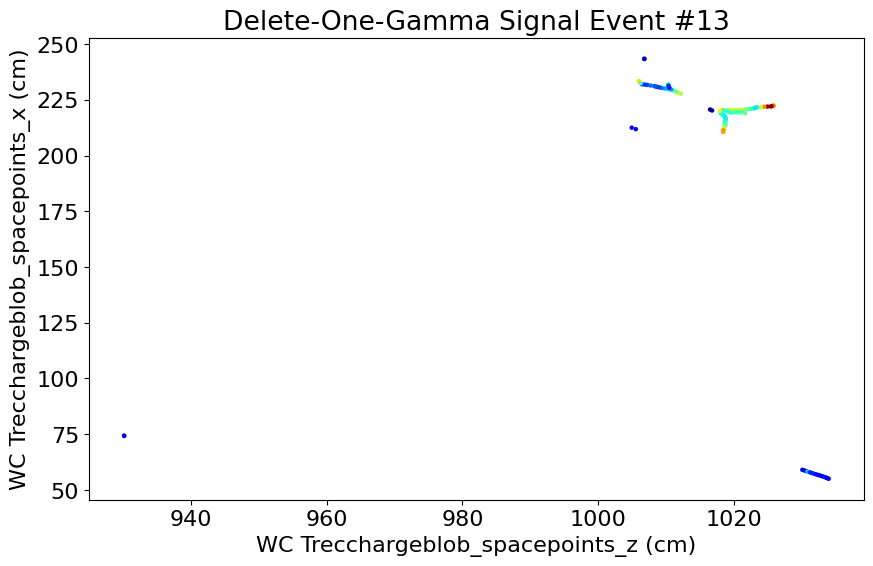

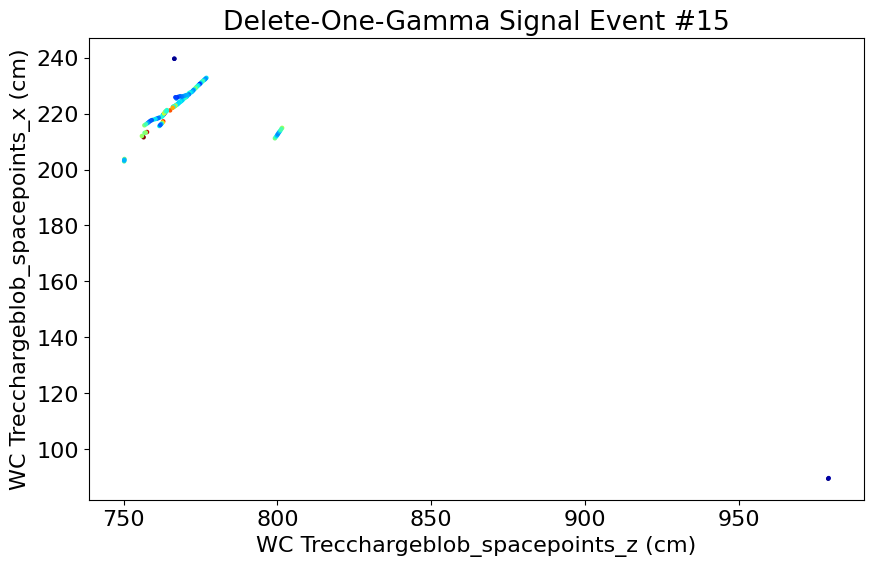

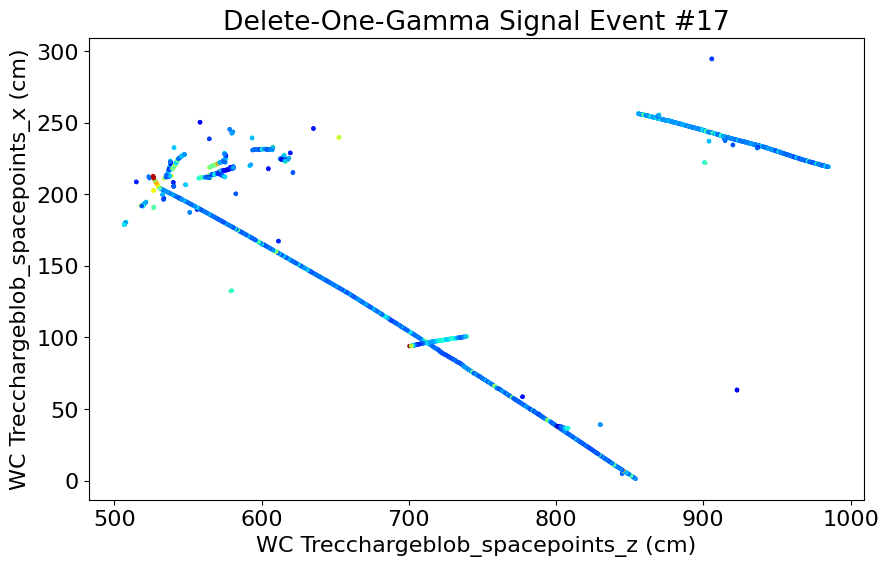

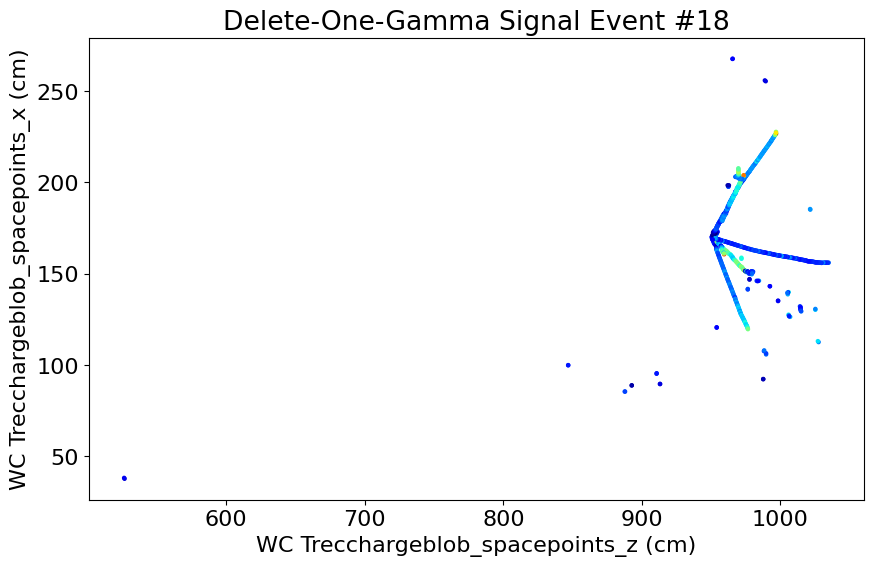

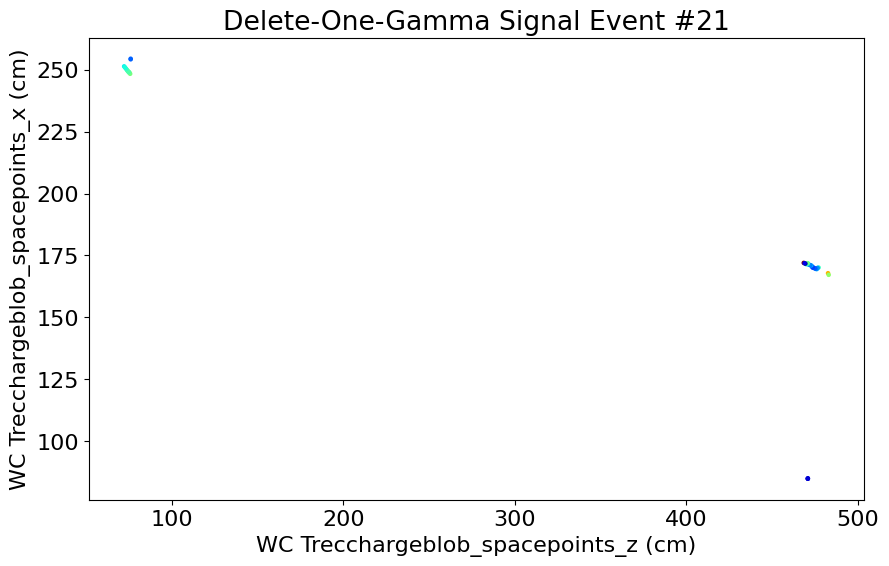

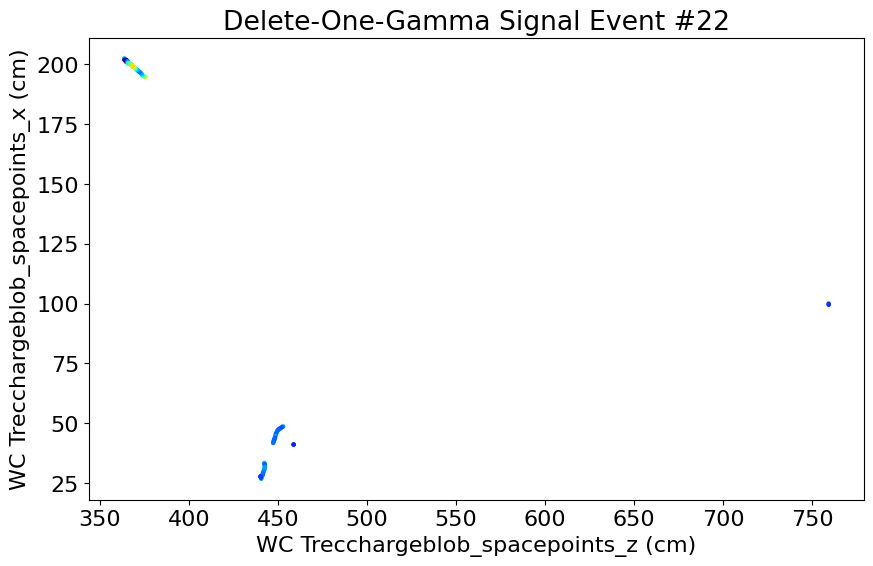

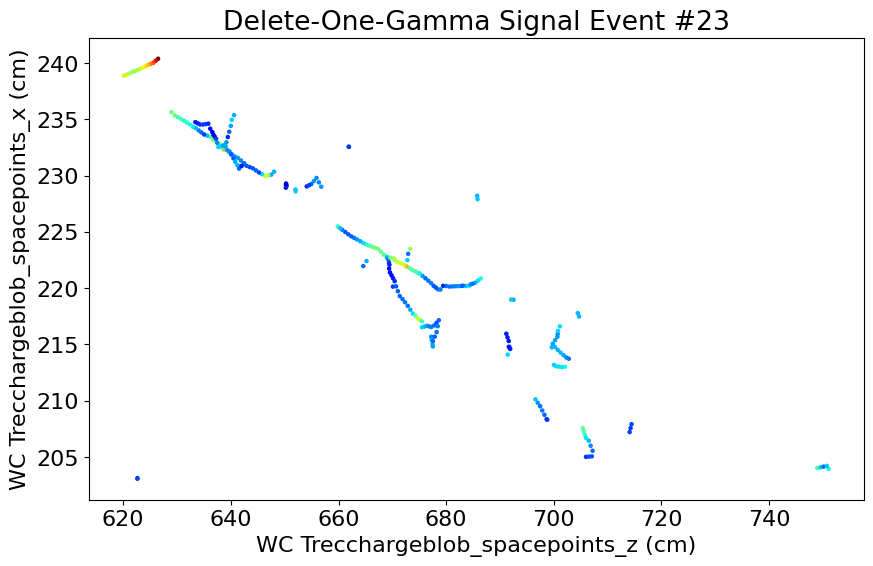

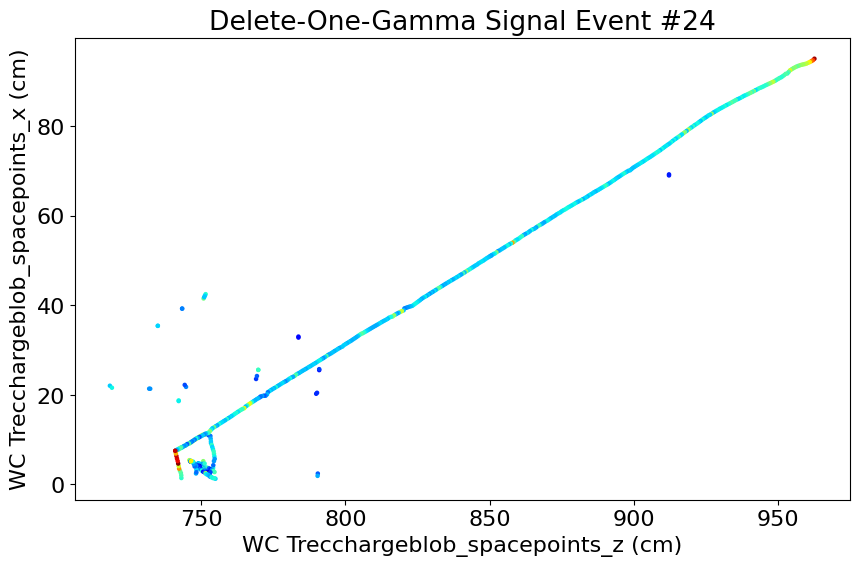

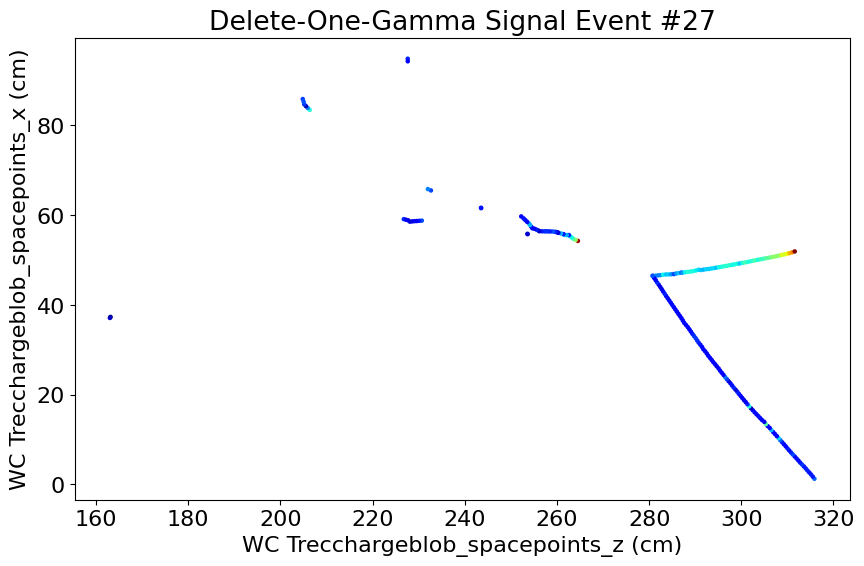

In [5]:
wc_reco_spacepoint_xs = del1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_x", library="np")["Trecchargeblob_spacepoints_x"]
wc_reco_spacepoint_ys = del1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_y", library="np")["Trecchargeblob_spacepoints_y"]
wc_reco_spacepoint_zs = del1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_z", library="np")["Trecchargeblob_spacepoints_z"]
wc_reco_spacepoint_qs = del1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_q", library="np")["Trecchargeblob_spacepoints_q"]
for event_idx in range(30):
    num_spacepoints = len(wc_reco_spacepoint_xs[event_idx])
    if num_spacepoints > 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(wc_reco_spacepoint_zs[event_idx], wc_reco_spacepoint_xs[event_idx], c=wc_reco_spacepoint_qs[event_idx], cmap="jet", s=5)
        plt.xlabel("WC Trecchargeblob_spacepoints_z (cm)")
        plt.ylabel("WC Trecchargeblob_spacepoints_x (cm)")
        plt.title(f"Delete-One-Gamma Signal Event #{event_idx}")
        plt.show()


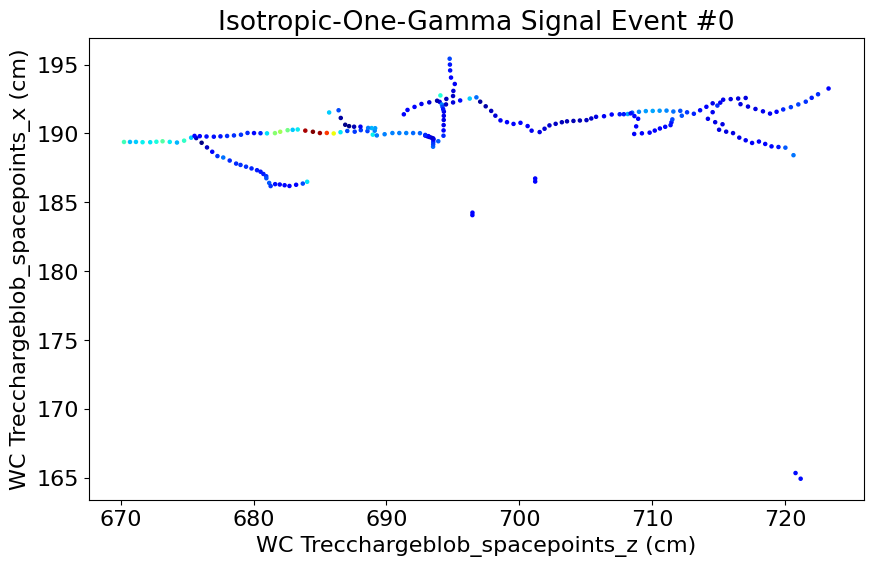

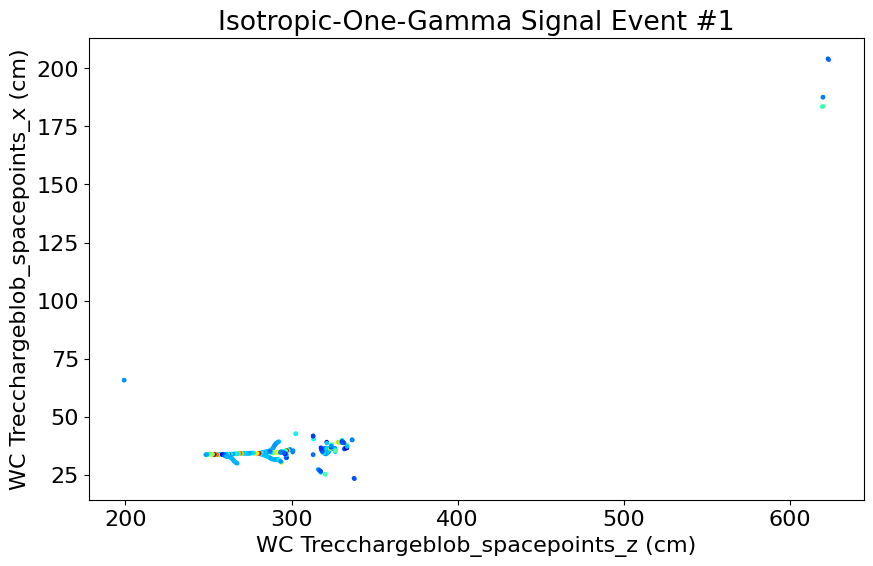

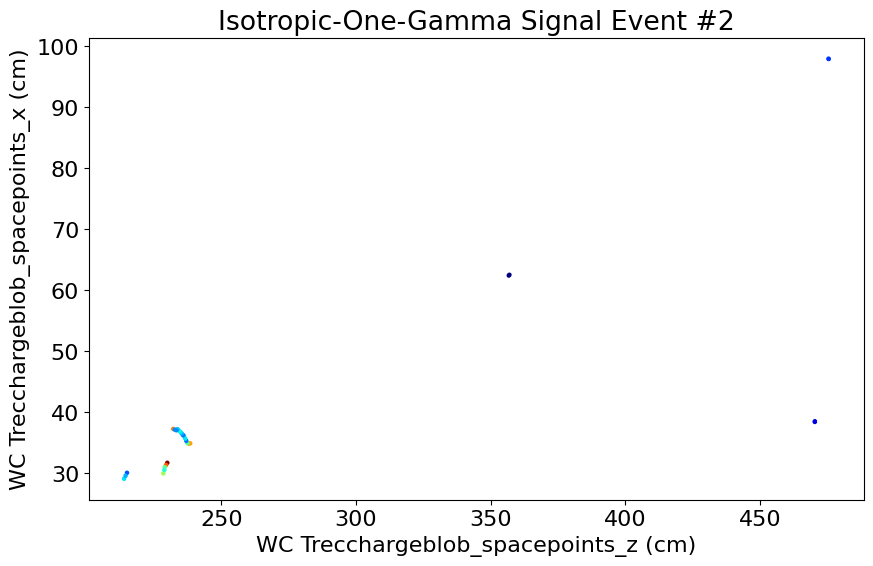

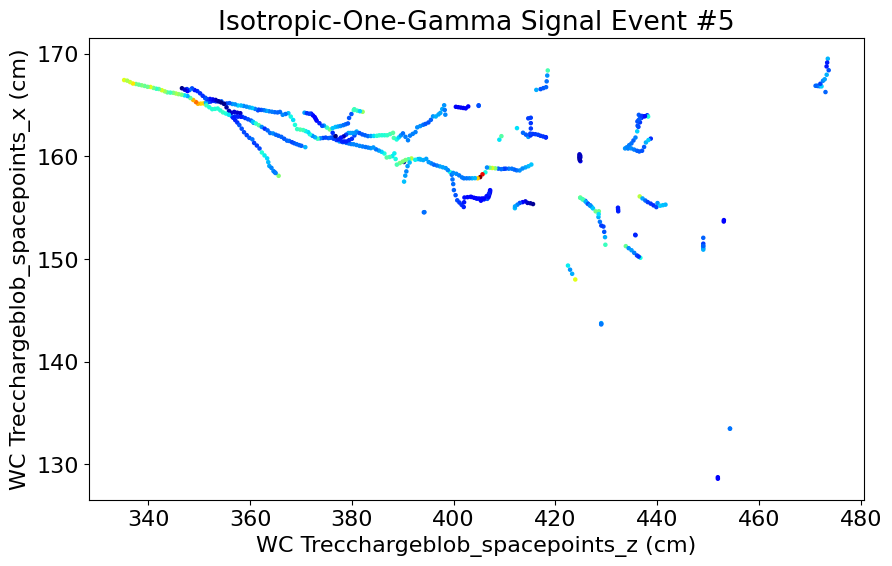

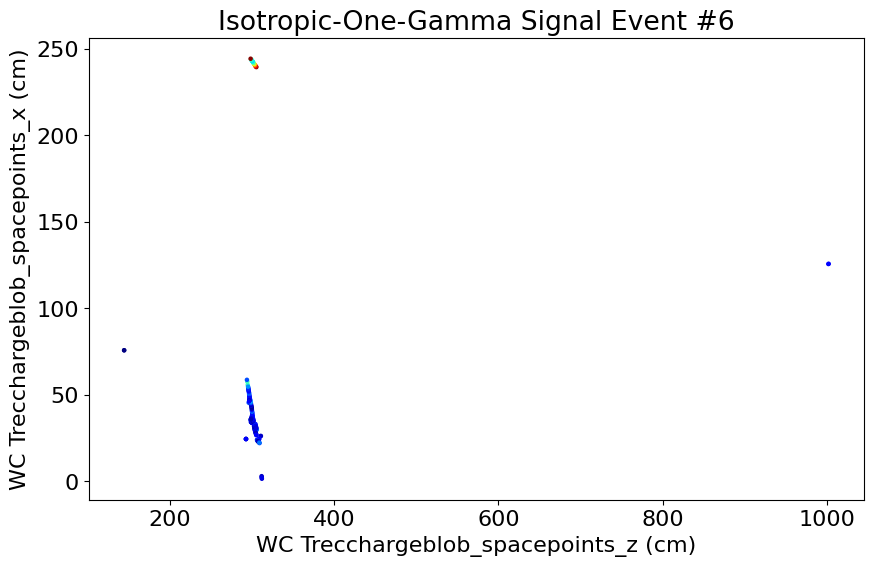

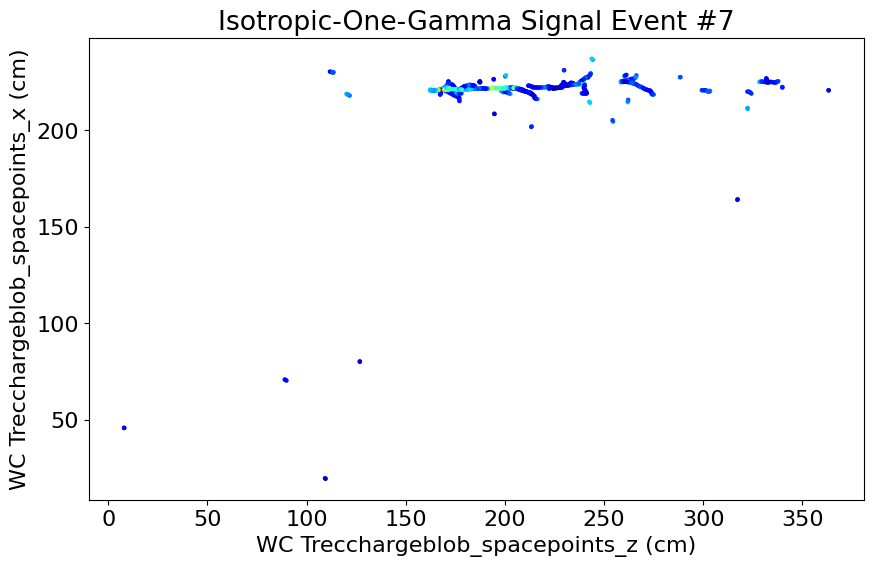

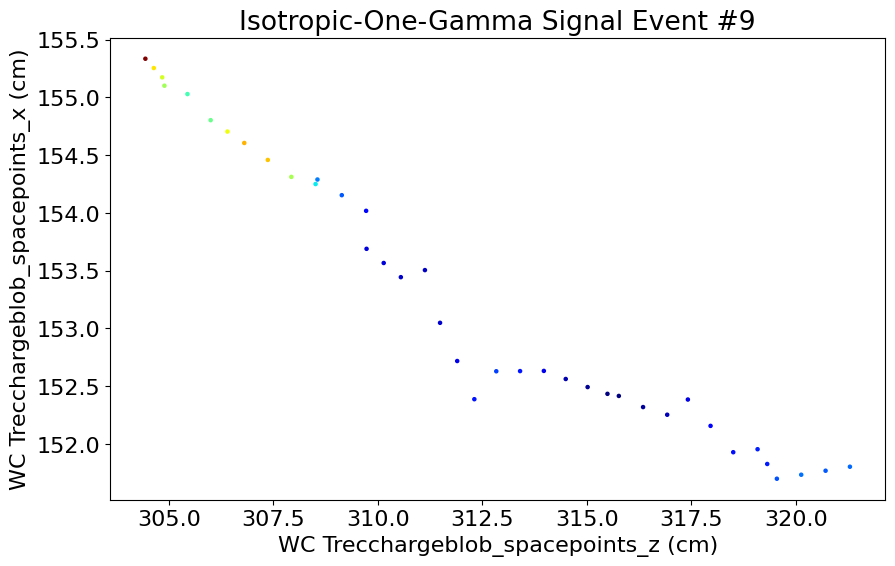

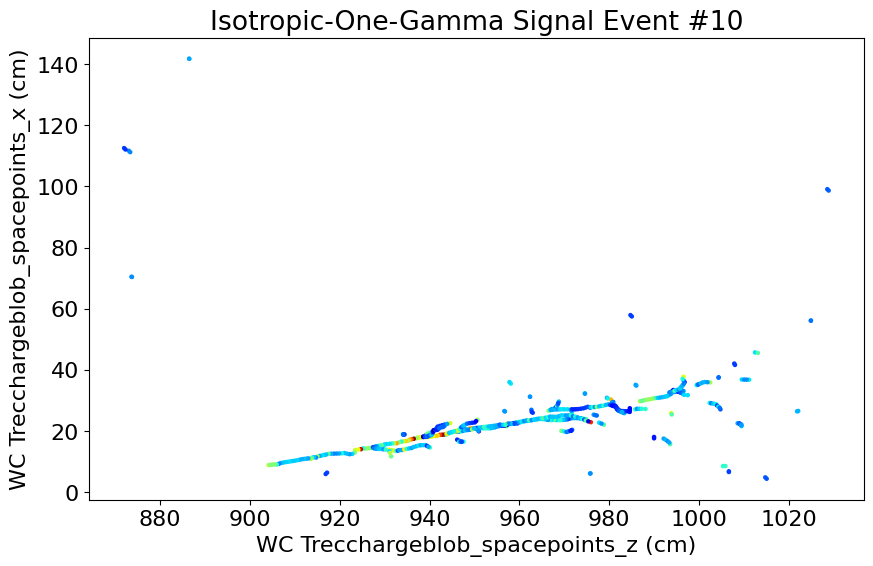

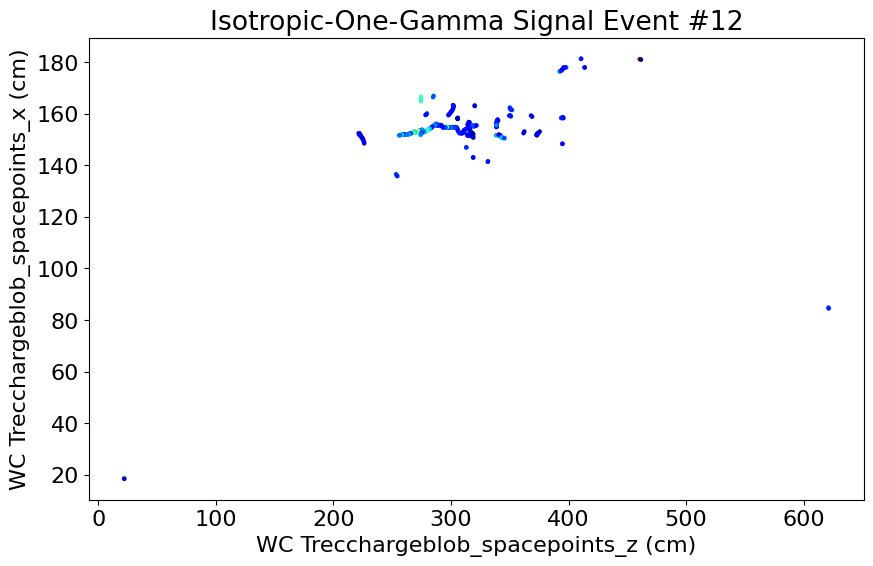

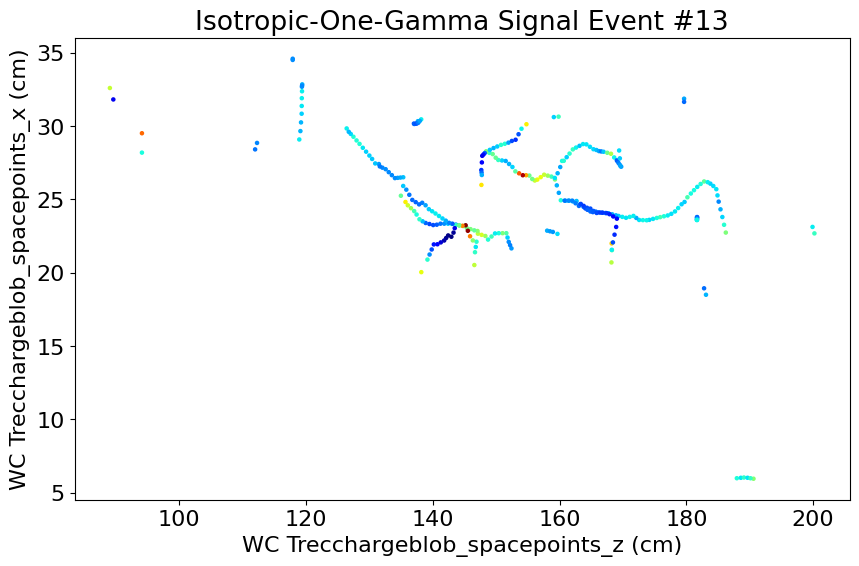

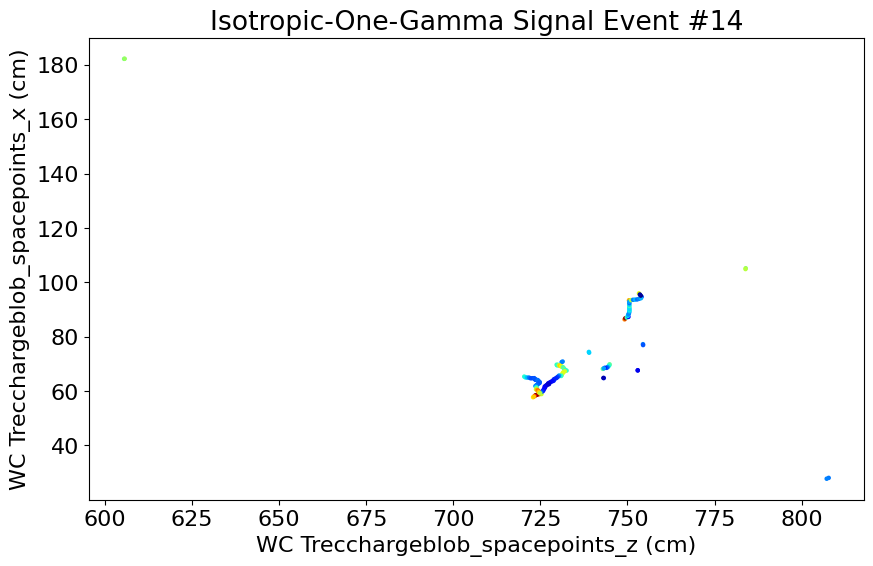

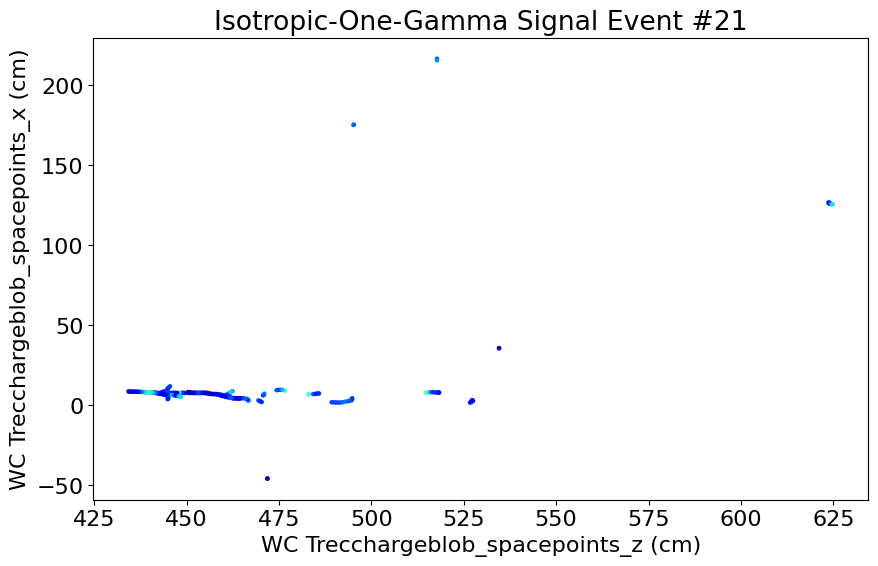

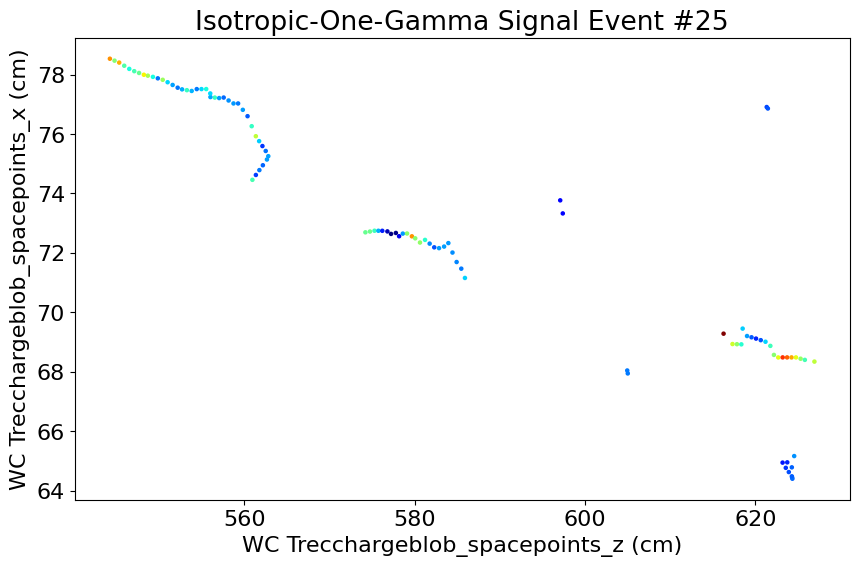

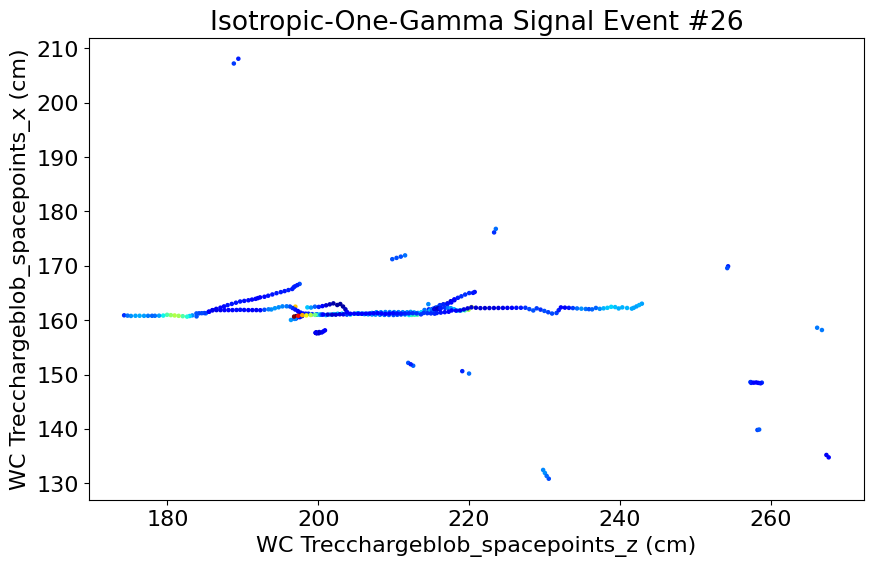

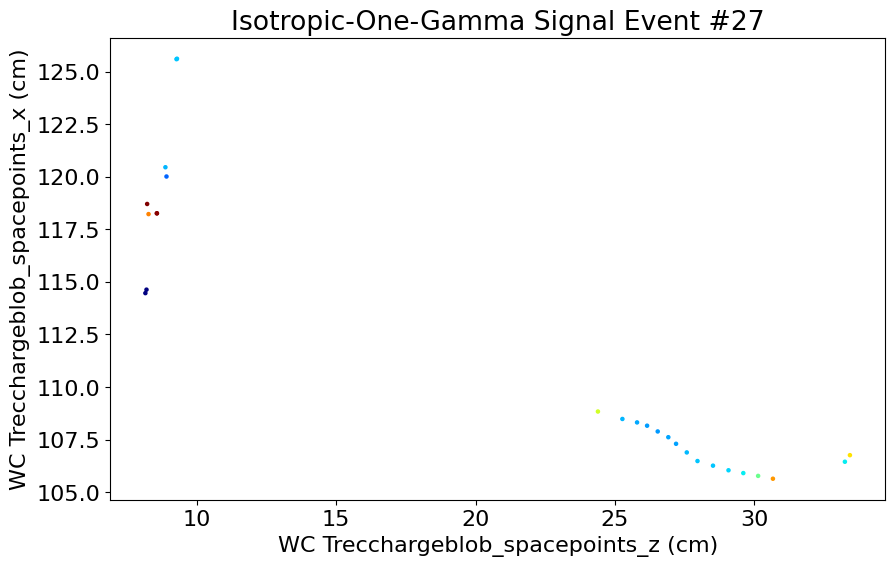

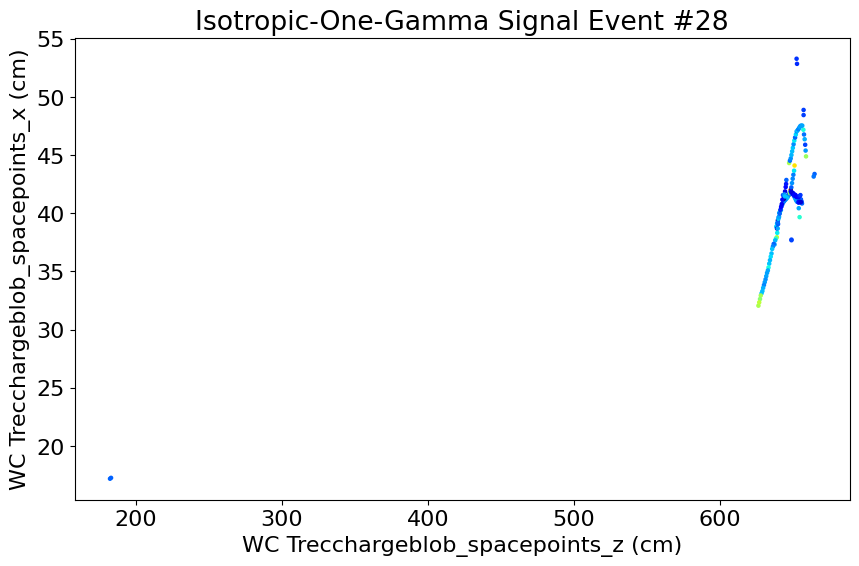

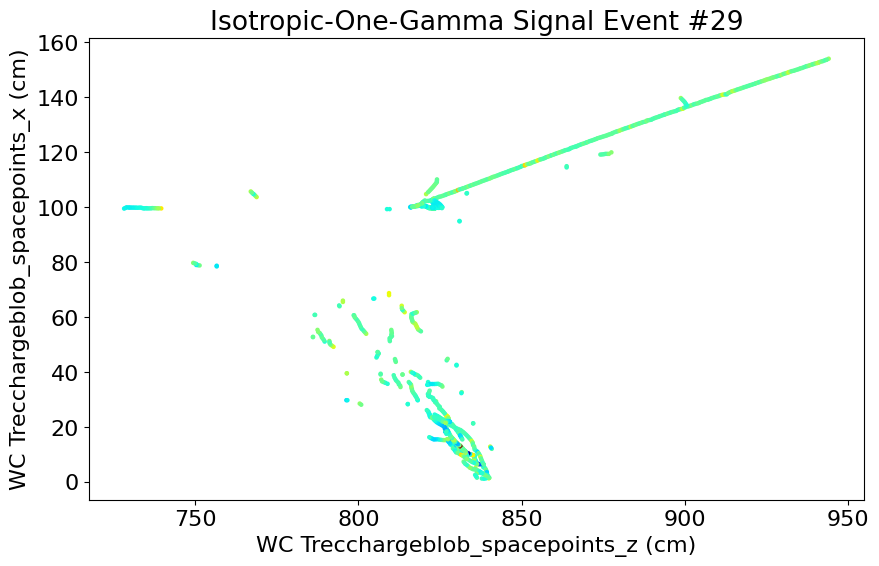

In [6]:
wc_reco_spacepoint_xs = iso1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_x", library="np")["Trecchargeblob_spacepoints_x"]
wc_reco_spacepoint_ys = iso1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_y", library="np")["Trecchargeblob_spacepoints_y"]
wc_reco_spacepoint_zs = iso1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_z", library="np")["Trecchargeblob_spacepoints_z"]
wc_reco_spacepoint_qs = iso1g_f["wcpselection"]["T_spacepoints"].arrays("Trecchargeblob_spacepoints_q", library="np")["Trecchargeblob_spacepoints_q"]
for event_idx in range(30):
    num_spacepoints = len(wc_reco_spacepoint_xs[event_idx])
    if num_spacepoints > 0:
        plt.figure(figsize=(10, 6))
        plt.scatter(wc_reco_spacepoint_zs[event_idx], wc_reco_spacepoint_xs[event_idx], c=wc_reco_spacepoint_qs[event_idx], cmap="jet", s=5)
        plt.xlabel("WC Trecchargeblob_spacepoints_z (cm)")
        plt.ylabel("WC Trecchargeblob_spacepoints_x (cm)")
        plt.title(f"Isotropic-One-Gamma Signal Event #{event_idx}")
        plt.show()


# True and Reco Shower Kinematics

In [7]:
del1g_true_prim_photon_energy = []
del1g_true_prim_photon_costheta = []
truth_pdgs = del1g_f["wcpselection"]["T_PFeval"].arrays("truth_pdg", library="np")["truth_pdg"]
truth_mothers = del1g_f["wcpselection"]["T_PFeval"].arrays("truth_mother", library="np")["truth_mother"]
truth_startMomentums = del1g_f["wcpselection"]["T_PFeval"].arrays("truth_startMomentum", library="np")["truth_startMomentum"]
for event_idx in range(del1g_num_events):
    for j in range(len(truth_pdgs[event_idx])):
        if truth_pdgs[event_idx][j] == 22 and truth_mothers[event_idx][j] == 0:
            del1g_true_prim_photon_energy.append(truth_startMomentums[event_idx][j][3])
            del1g_true_prim_photon_costheta.append(truth_startMomentums[event_idx][j][2]
                            / np.sqrt(truth_startMomentums[event_idx][j][0]**2 + truth_startMomentums[event_idx][j][1]**2 + truth_startMomentums[event_idx][j][2]**2))
del1g_true_prim_photon_energy = np.array(del1g_true_prim_photon_energy)
del1g_true_prim_photon_costheta = np.array(del1g_true_prim_photon_costheta)

iso1g_true_prim_photon_energy = []
iso1g_true_prim_photon_costheta = []
truth_pdgs = iso1g_f["wcpselection"]["T_PFeval"].arrays("truth_pdg", library="np")["truth_pdg"]
truth_mothers = iso1g_f["wcpselection"]["T_PFeval"].arrays("truth_mother", library="np")["truth_mother"]
truth_startMomentums = iso1g_f["wcpselection"]["T_PFeval"].arrays("truth_startMomentum", library="np")["truth_startMomentum"]
for event_idx in range(iso1g_num_events):
    for j in range(len(truth_pdgs[event_idx])):
        if truth_pdgs[event_idx][j] == 22 and truth_mothers[event_idx][j] == 0:
            iso1g_true_prim_photon_energy.append(truth_startMomentums[event_idx][j][3])
            iso1g_true_prim_photon_costheta.append(truth_startMomentums[event_idx][j][2]
                            / np.sqrt(truth_startMomentums[event_idx][j][0]**2 + truth_startMomentums[event_idx][j][1]**2 + truth_startMomentums[event_idx][j][2]**2))
iso1g_true_prim_photon_energy = np.array(iso1g_true_prim_photon_energy)
iso1g_true_prim_photon_costheta = np.array(iso1g_true_prim_photon_costheta)


## Shower Energy

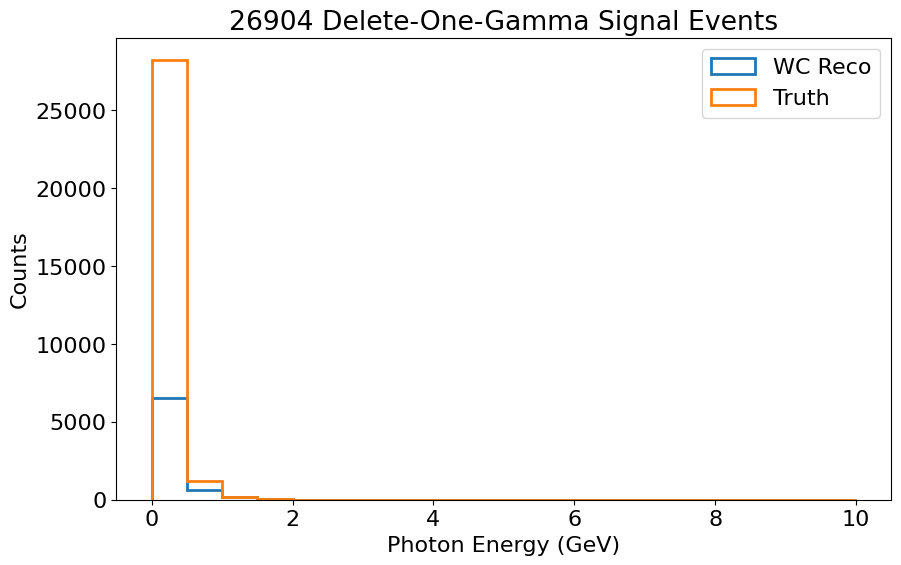

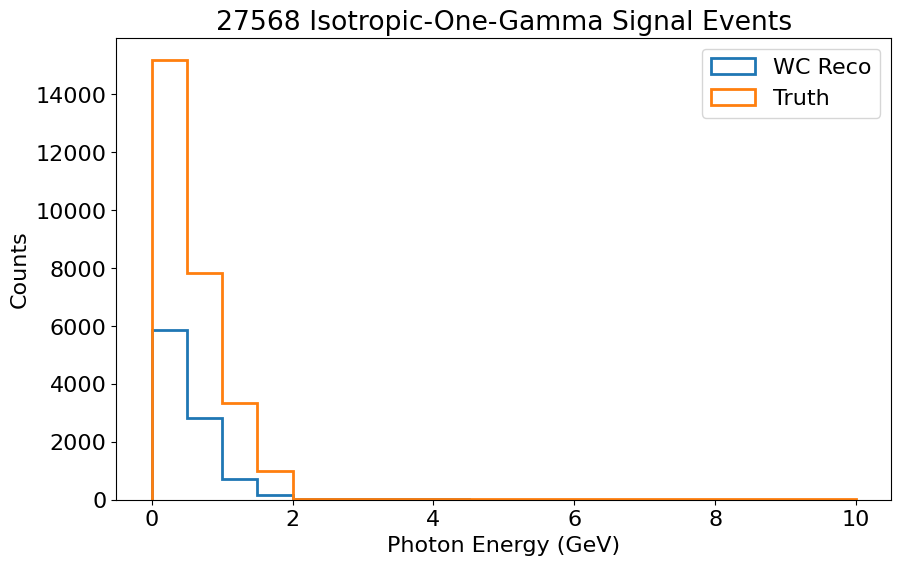

In [8]:
del1g_wc_reco_showerKE = del1g_f["wcpselection"]["T_PFeval"].arrays("reco_showerKE", library="np")["reco_showerKE"]
iso1g_wc_reco_showerKE = iso1g_f["wcpselection"]["T_PFeval"].arrays("reco_showerKE", library="np")["reco_showerKE"]

bins = np.linspace(0, 10, 21)

plt.figure(figsize=(10, 6))
plt.hist(del1g_wc_reco_showerKE, bins=bins, histtype="step", lw=2, label="WC Reco")
plt.hist(del1g_true_prim_photon_energy, bins=bins, histtype="step", lw=2, label="Truth")
plt.xlabel("Photon Energy (GeV)")
plt.ylabel("Counts")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(iso1g_wc_reco_showerKE, bins=bins, histtype="step", lw=2, label="WC Reco")
plt.hist(iso1g_true_prim_photon_energy, bins=bins, histtype="step", lw=2, label="Truth")
plt.xlabel("Photon Energy (GeV)")
plt.ylabel("Counts")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.legend()
plt.show()


# Shower Angle

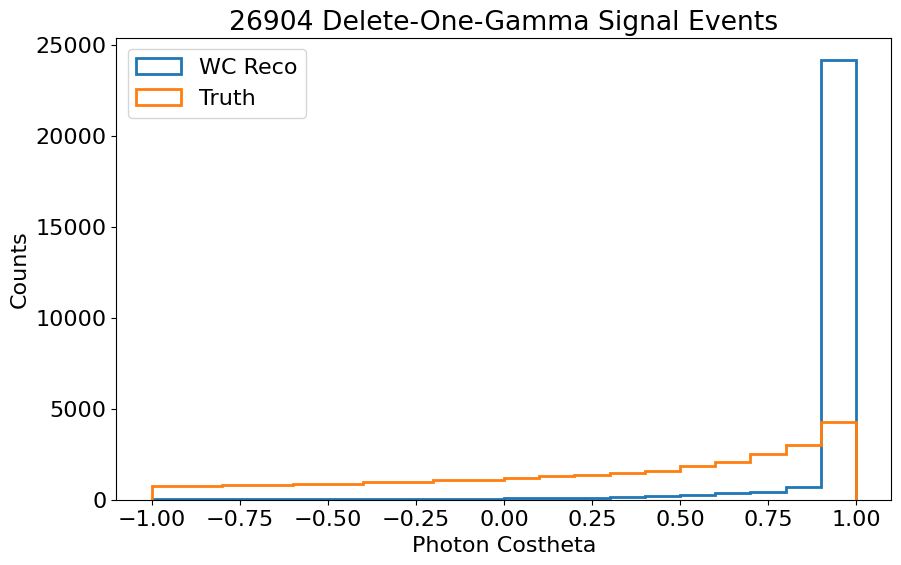

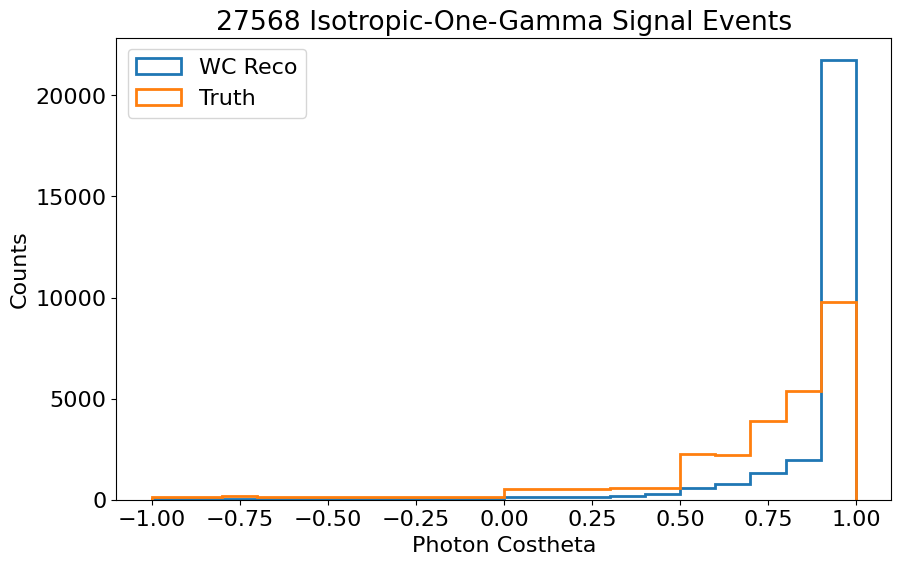

In [9]:

del1g_wc_shower_angle = del1g_f["wcpselection"]["T_BDTvars"].arrays("mip_angle_beam", library="np")["mip_angle_beam"]
del1g_wc_shower_costheta = np.cos(del1g_wc_shower_angle * np.pi / 180)
iso1g_wc_shower_angle = iso1g_f["wcpselection"]["T_BDTvars"].arrays("mip_angle_beam", library="np")["mip_angle_beam"]
iso1g_wc_shower_costheta = np.cos(iso1g_wc_shower_angle * np.pi / 180)

bins = np.linspace(-1, 1, 21)

plt.figure(figsize=(10, 6))
plt.hist(del1g_wc_shower_costheta, bins=bins, histtype="step", lw=2, label="WC Reco")
plt.hist(del1g_true_prim_photon_costheta, bins=bins, histtype="step", lw=2, label="Truth")
plt.xlabel("Photon Costheta")
plt.ylabel("Counts")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(iso1g_wc_shower_costheta, bins=bins, histtype="step", lw=2, label="WC Reco")
plt.hist(iso1g_true_prim_photon_costheta, bins=bins, histtype="step", lw=2, label="Truth")
plt.xlabel("Photon Costheta")
plt.ylabel("Counts")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events")
plt.legend()
plt.show()


# 2D Shower Energy/Angle

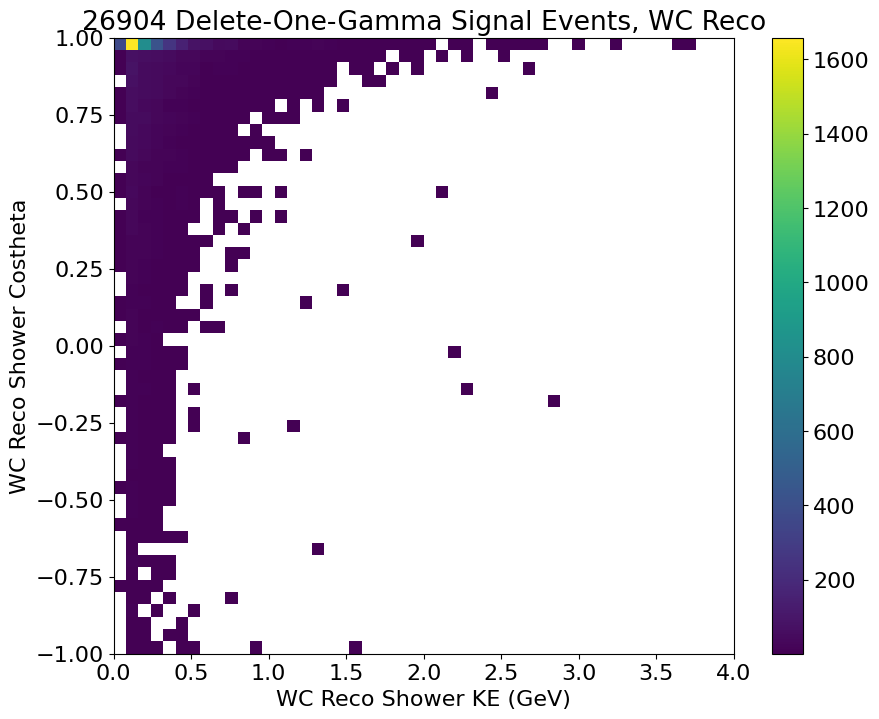

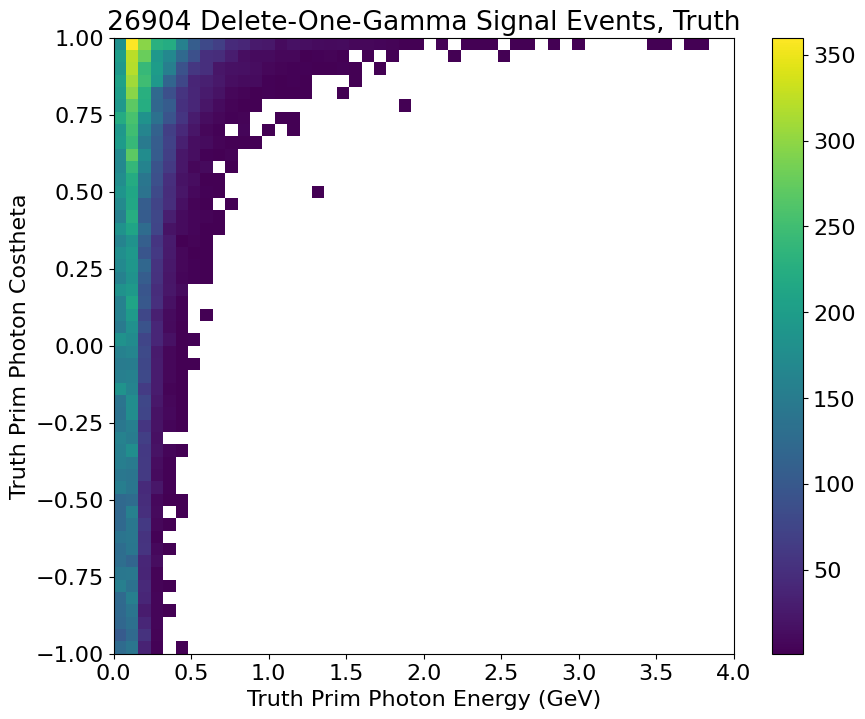

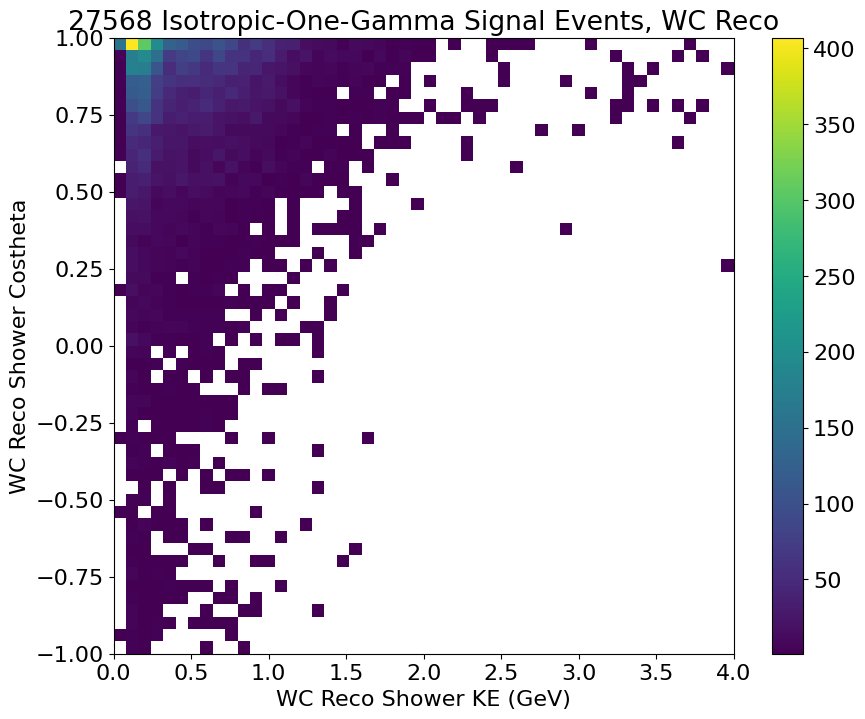

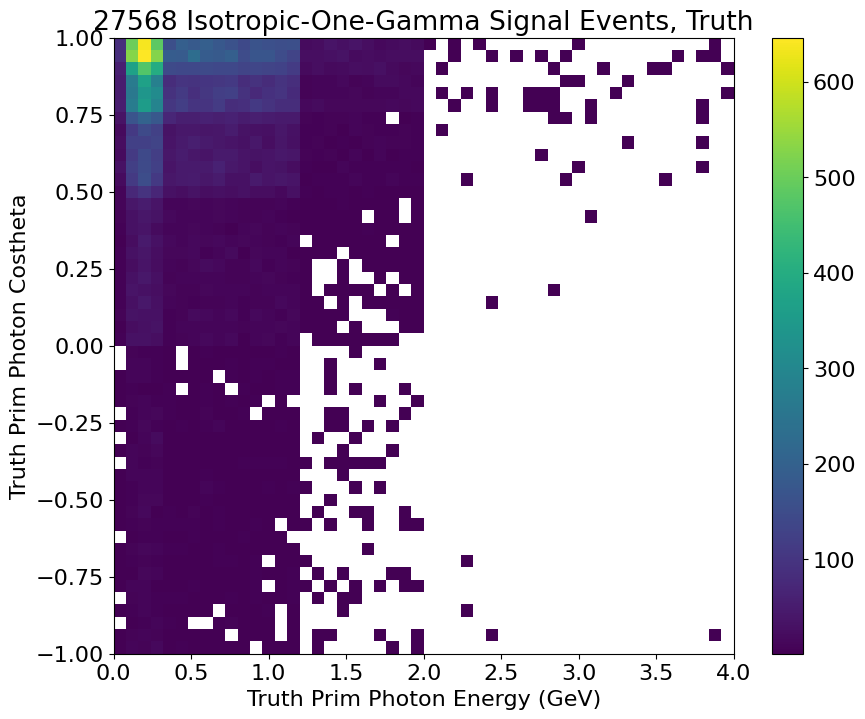

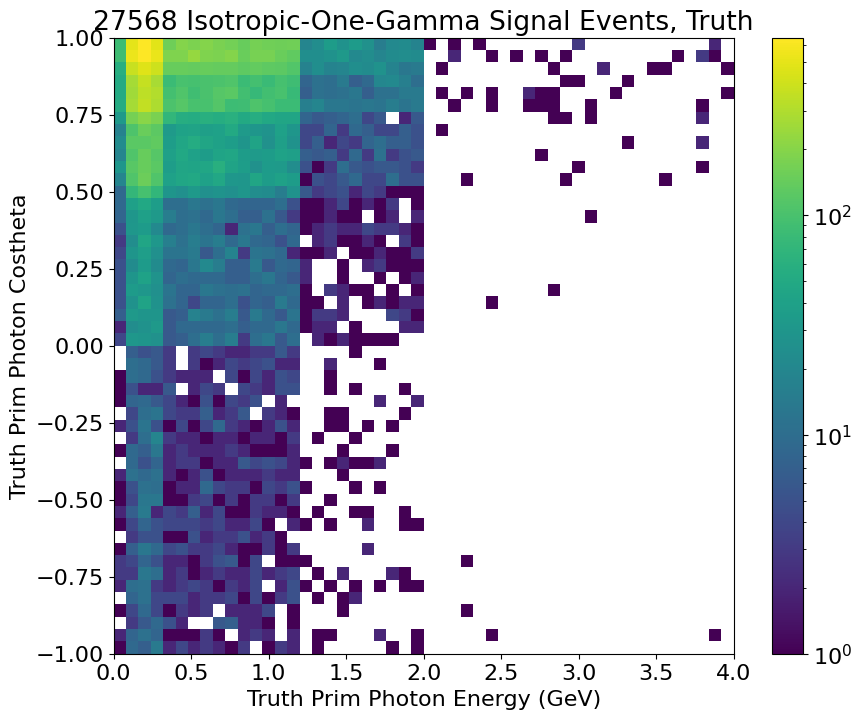

In [13]:
bins = (np.linspace(0, 4, 51), np.linspace(-1, 1, 51))

plt.figure(figsize=(10, 8))
plt.hist2d(del1g_wc_reco_showerKE, del1g_wc_shower_costheta, bins=bins, cmin=0.01)
plt.colorbar()
plt.xlabel("WC Reco Shower KE (GeV)")
plt.ylabel("WC Reco Shower Costheta")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events, WC Reco")
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(del1g_true_prim_photon_energy, del1g_true_prim_photon_costheta, bins=bins, cmin=0.01)
plt.colorbar()
plt.xlabel("Truth Prim Photon Energy (GeV)")
plt.ylabel("Truth Prim Photon Costheta")
plt.title(f"{del1g_num_events} Delete-One-Gamma Signal Events, Truth")
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(iso1g_wc_reco_showerKE, iso1g_wc_shower_costheta, bins=bins, cmin=0.01)
plt.colorbar()
plt.xlabel("WC Reco Shower KE (GeV)")
plt.ylabel("WC Reco Shower Costheta")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events, WC Reco")
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(iso1g_true_prim_photon_energy, iso1g_true_prim_photon_costheta, bins=bins, cmin=0.01)
plt.colorbar()
plt.xlabel("Truth Prim Photon Energy (GeV)")
plt.ylabel("Truth Prim Photon Costheta")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events, Truth")
plt.show()

plt.figure(figsize=(10, 8))
plt.hist2d(iso1g_true_prim_photon_energy, iso1g_true_prim_photon_costheta, bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlabel("Truth Prim Photon Energy (GeV)")
plt.ylabel("Truth Prim Photon Costheta")
plt.title(f"{iso1g_num_events} Isotropic-One-Gamma Signal Events, Truth")
plt.show()
